# VotingClassifier

**After running the GradientBoosting, Random Forest, SVC models and then getting the<br> features importance for each of the models,
we then run the Voting Classifier model only using<br> only the common features between at least two of the three models**
~~~javascript



best_x_between_models=['PageValues_skew_s', 'TrafficType_dummies_8',
        'Region_dummies_2','season_dummies_Spring',
        'OperatingSystems_dummies_2', 'Region_dummies_1',
       'Weekend_binary','TrafficType_dummies_2',
        'average_informational_duration_skew_s','average_ProductRelated_duration_skew_s', 
        'average_administrative_duration_skew_s','average_BounceRates/ExitRates_skew_s',
        'season_dummies_Fall']




                                     
GradientBoosting_best_features = ['Browser_dummies_2', 'TrafficType_dummies_8', 
                    'Region_dummies_2', 'season_dummies_Spring',
                    'OperatingSystems_dummies_2', 'Region_dummies_3',
                    'Weekend_binary', 'Region_dummies_1',
       'TrafficType_dummies_2', 'average_informational_duration_skew_s',
                    'average_ProductRelated_duration_skew_s', 
                    'average_administrative_duration_skew_s',
                    'average_BounceRates/ExitRates_skew_s',
       'season_dummies_Fall', 'PageValues_skew_s']                      

RandomForest_best_features = ['Region_dummies_1', 'TrafficType_dummies_11',
       'season_dummies_winter', 'Weekend_binary',
       'VisitorType_dummies_New_Visitor','VisitorType_dummies_Returning_Visitor',
       'OperatingSystems_dummies_2', 'TrafficType_dummies_3', 
       'average_informational_duration_skew_s',
       'OperatingSystems_dummies_3', 'season_dummies_Spring',
       'TrafficType_dummies_2', 'season_dummies_Fall',
       'average_ProductRelated_duration_skew_s', 
        'average_administrative_duration_skew_s',
       'average_BounceRates/ExitRates_skew_s', 'PageValues_skew_s']



SVC_best_features = ['Region_dummies_2', 'Browser_dummies_1',
                     'Browser_dummies_8', 'Browser_dummies_12',
                     'season_dummies_winter', 'Browser_dummies_13', 
                     'season_dummies_summer', 'season_dummies_Fall',
       'OperatingSystems_dummies_7', 'TrafficType_dummies_13', 
                     'TrafficType_dummies_9', 'TrafficType_dummies_14',
                     'TrafficType_dummies_7', 'TrafficType_dummies_6',
                     'TrafficType_dummies_20',
       'TrafficType_dummies_1', 'TrafficType_dummies_4',
                     'TrafficType_dummies_3', 'TrafficType_dummies_5', 
                     'TrafficType_dummies_10', 'TrafficType_dummies_11',
                     'TrafficType_dummies_2',
       'TrafficType_dummies_8', 'TrafficType_dummies_16', 'PageValues_skew_s']


~~~

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.metrics import f1_score






from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

plt.style.use('seaborn')
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.max_rows', 100)
from IPython.display import display, Markdown, Latex
from sklearn.ensemble import ExtraTreesClassifier


In [5]:
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

from imblearn.datasets import fetch_datasets
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import RUSBoostClassifier

from imblearn.metrics import geometric_mean_score
from imblearn.under_sampling import NearMiss 




#reading the data
from scaled_data import *
X,y = clean_data()

best_x=['PageValues_skew_s', 'TrafficType_dummies_8',
        'Region_dummies_2','season_dummies_Spring',
        'OperatingSystems_dummies_2', 'Region_dummies_1',
       'Weekend_binary','TrafficType_dummies_2',
        'average_informational_duration_skew_s','average_ProductRelated_duration_skew_s', 
        'average_administrative_duration_skew_s','average_BounceRates/ExitRates_skew_s',
        'season_dummies_Fall']
best_x1 = [  'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3', 'TrafficType_dummies_8',
           'VisitorType_dummies_New_Visitor', 'OperatingSystems_dummies_6', 'Weekend_binary', 'Region_dummies_6',
           'TrafficType_dummies_6', 'season_dummies_Fall', 'season_dummies_Spring', 'TrafficType_dummies_12','PageValues_skew_s',
           'average_ProductRelated_duration_skew_s', 'TrafficType_dummies_7', 'average_BounceRates/ExitRates_skew_s']
X=X[best_x1]
VC_Xdata = X.copy() #making our X columns


#getting the values of our x features:
#Xrf_model = rf_model_Xdata[best_features_spsa].values
#Xrf_model= rf_model_Xdata[cols_2].values
XVC_model = VC_Xdata.values

#getting the values of our y:
y_VC_model = y.values.ravel() # target


from sklearn.model_selection import train_test_split

#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(XVC_model, y_VC_model , test_size=0.25, random_state=8)

from imblearn.over_sampling import SMOTE

sm =SMOTE(k_neighbors=4,random_state=123)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)








clf1 = GradientBoostingClassifier(learning_rate=0.05,n_estimators=1250,
                                  max_depth=4, min_samples_split=5,
                                  min_samples_leaf=1, subsample=1,
                                  random_state=123)
                                     
GB_best_features = ['Browser_dummies_2', 'TrafficType_dummies_8', 
                    'Region_dummies_2', 'season_dummies_Spring',
                    'OperatingSystems_dummies_2', 'Region_dummies_3',
                    'Weekend_binary', 'Region_dummies_1',
       'TrafficType_dummies_2', 'average_informational_duration_skew_s',
                    'average_ProductRelated_duration_skew_s', 
                    'average_administrative_duration_skew_s',
                    'average_BounceRates/ExitRates_skew_s',
       'season_dummies_Fall', 'PageValues_skew_s']                      
'''clf2 =RandomForestClassifier(max_depth =  4 , 
                                  min_samples_split = 6,
                                  min_samples_leaf =1  , 
                                  n_estimators = 1750 ,
                                  random_state=123)
'''

clf2 =BalancedRandomForestClassifier(max_depth =  7 , 
                                  min_samples_split = 6,
                                  min_samples_leaf =1  , 
                                  n_estimators = 1750 ,
                                  random_state=123)
                                     #,n_jobs=-1)


RF_best_features = ['Region_dummies_1', 'TrafficType_dummies_11',
                    'season_dummies_winter', 'Weekend_binary',
       'VisitorType_dummies_New_Visitor',
                    'VisitorType_dummies_Returning_Visitor',
                    'OperatingSystems_dummies_2', 'TrafficType_dummies_3', 
                    'average_informational_duration_skew_s',
       'OperatingSystems_dummies_3', 'season_dummies_Spring',
                    'TrafficType_dummies_2', 'season_dummies_Fall',
                    'average_ProductRelated_duration_skew_s', 
                    'average_administrative_duration_skew_s',
       'average_BounceRates/ExitRates_skew_s', 'PageValues_skew_s']

clf3 = SVC(C=1, break_ties=False, cache_size=200,
           class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3,
           gamma=1, kernel='linear',
    max_iter=-1, probability=True, random_state=123,
           shrinking=True, tol=0.001,
           verbose=False)

#base_estimator = AdaBoostClassifier(n_estimators=50)
#clf3 = base_estimator
#EasyEnsembleClassifier(n_estimators=50, base_estimator=base_estimator,n_jobs=-1)
#clf3= RUSBoostClassifier(random_state=123)

SVC_best_features = ['Region_dummies_2', 'Browser_dummies_1',
                     'Browser_dummies_8', 'Browser_dummies_12',
                     'season_dummies_winter', 'Browser_dummies_13', 
                     'season_dummies_summer', 'season_dummies_Fall',
       'OperatingSystems_dummies_7', 'TrafficType_dummies_13', 
                     'TrafficType_dummies_9', 'TrafficType_dummies_14',
                     'TrafficType_dummies_7', 'TrafficType_dummies_6',
                     'TrafficType_dummies_20',
       'TrafficType_dummies_1', 'TrafficType_dummies_4',
                     'TrafficType_dummies_3', 'TrafficType_dummies_5', 
                     'TrafficType_dummies_10', 'TrafficType_dummies_11',
                     'TrafficType_dummies_2',
       'TrafficType_dummies_8', 'TrafficType_dummies_16', 'PageValues_skew_s']

eclf = VotingClassifier(estimators=[('gb', clf1), ('rf', clf2), ("SVC", clf3) ],voting='soft')





eclf.fit(X_train_bal,y_train_bal)

eclf_train_pred= eclf.predict(X_train_bal)

eclf_test_pred = eclf.predict(X_test)

print(eclf.estimators)



[('gb', GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=1250,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)), ('rf', BalancedRandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                               criterion='gini', max_depth=7,
                               max_features='auto', max_leaf_nodes=None,
                               max_samples=None, min_impurity_decrease=

In [9]:
feature_lst

['Browser_dummies_6',
 'Browser_dummies_11',
 'TrafficType_dummies_3',
 'Region_dummies_2',
 'Browser_dummies_5',
 'Region_dummies_3',
 'Browser_dummies_10',
 'Browser_dummies_3',
 'TrafficType_dummies_8',
 'VisitorType_dummies_New_Visitor',
 'OperatingSystems_dummies_6',
 'Weekend_binary',
 'Region_dummies_6',
 'TrafficType_dummies_6',
 'season_dummies_Fall',
 'season_dummies_Spring',
 'TrafficType_dummies_12',
 'average_ProductRelated_duration_skew_s',
 'TrafficType_dummies_7',
 'average_BounceRates/ExitRates_skew_s',
 'OperatingSystems_dummies_2',
 'Browser_dummies_12',
 'VisitorType_dummies_Returning_Visitor',
 'TrafficType_dummies_10',
 'TrafficType_dummies_19',
 'Region_dummies_7',
 'TrafficType_dummies_14',
 'TrafficType_dummies_16',
 'Region_dummies_9',
 'Browser_dummies_9',
 'TrafficType_dummies_13',
 'Browser_dummies_4',
 'TrafficType_dummies_11',
 'Browser_dummies_7',
 'Region_dummies_8',
 'Region_dummies_1',
 'season_dummies_summer',
 'TrafficType_dummies_2',
 'TrafficType_

In [6]:
import numpy as np
from scaled_data import *
X_df,y_df = clean_data()

# define the feature list to select from
feature_lst =list(X_df.columns)
#type(feature_lst)
feature_lst
np.random.shuffle(feature_lst)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold

selected_features = []
eclf = VotingClassifier(estimators=[('gb', clf1), ('rf', clf2), ("SVC", clf3) ],voting='soft')

from imblearn.over_sampling import SMOTE
for feat in feature_lst:
    selected_features.append(feat)
    X_train, X_test, y_train, y_test= train_test_split(X_df,y_df, test_size=0.25, random_state=123)
    X = X_train[selected_features].values#.ravel()
    y = y_train.values.ravel()
    



    sm =SMOTE(k_neighbors=4,random_state=123)
    X_train_bal, y_train_bal = sm.fit_sample(X, y)
  #lr.fit(X,y)
    kfold = KFold(n_splits=5, random_state=123)
    f1_scores = cross_val_score(eclf,X_train_bal, y_train_bal, cv=2, scoring='f1')
    #roc_scores = cross_val_score(eclf, X_train_bal, y_train_bal, cv=kfold, scoring='roc_auc')
    print('Current selected features', selected_features)
    print('\n')
    print('average f1 score (bias)', f1_scores.mean())
    print('average f1 score (variance)', f1_scores.std())
    #print('average AUC score (bias)', roc_scores.mean())
    #print('average AUC score (variance)', roc_scores.std())
    print('\n')

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6']


average f1 score (bias) 0.0
average f1 score (variance) 0.0




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11']


average f1 score (bias) 0.0
average f1 score (variance) 0.0




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3']


average f1 score (bias) 0.6623227288715265
average f1 score (variance) 0.002080854343937788




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2']


average f1 score (bias) 0.6627362372238006
average f1 score (variance) 0.001919179010761607




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5']


average f1 score (bias) 0.662987927843679
average f1 score (variance) 0.0021708696306401154




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3']


average f1 score (bias) 0.6408356945611953
average f1 score (variance) 0.024323102913123895




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10']


average f1 score (bias) 0.6407123467843105
average f1 score (variance) 0.02437887166733904




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3']


average f1 score (bias) 0.6419636958730286
average f1 score (variance) 0.024956023238757397




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3', 'TrafficType_dummies_8']


average f1 score (bias) 0.6443454480427406
average f1 score (variance) 0.022763934368795202




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3', 'TrafficType_dummies_8', 'VisitorType_dummies_New_Visitor']


average f1 score (bias) 0.4137534885831089
average f1 score (variance) 0.036635616475256844




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3', 'TrafficType_dummies_8', 'VisitorType_dummies_New_Visitor', 'OperatingSystems_dummies_6']


average f1 score (bias) 0.4142740697361549
average f1 score (variance) 0.036407305993890554




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3', 'TrafficType_dummies_8', 'VisitorType_dummies_New_Visitor', 'OperatingSystems_dummies_6', 'Weekend_binary']


average f1 score (bias) 0.4590595028864253
average f1 score (variance) 0.03690944306759089




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3', 'TrafficType_dummies_8', 'VisitorType_dummies_New_Visitor', 'OperatingSystems_dummies_6', 'Weekend_binary', 'Region_dummies_6']


average f1 score (bias) 0.46743303427602295
average f1 score (variance) 0.07409611863926852




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3', 'TrafficType_dummies_8', 'VisitorType_dummies_New_Visitor', 'OperatingSystems_dummies_6', 'Weekend_binary', 'Region_dummies_6', 'TrafficType_dummies_6']


average f1 score (bias) 0.5884622203648475
average f1 score (variance) 0.061811003678868326




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3', 'TrafficType_dummies_8', 'VisitorType_dummies_New_Visitor', 'OperatingSystems_dummies_6', 'Weekend_binary', 'Region_dummies_6', 'TrafficType_dummies_6', 'season_dummies_Fall']


average f1 score (bias) 0.6423706556131099
average f1 score (variance) 0.001893539056646798




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3', 'TrafficType_dummies_8', 'VisitorType_dummies_New_Visitor', 'OperatingSystems_dummies_6', 'Weekend_binary', 'Region_dummies_6', 'TrafficType_dummies_6', 'season_dummies_Fall', 'season_dummies_Spring']


average f1 score (bias) 0.642240723973456
average f1 score (variance) 0.0037701203332831112




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3', 'TrafficType_dummies_8', 'VisitorType_dummies_New_Visitor', 'OperatingSystems_dummies_6', 'Weekend_binary', 'Region_dummies_6', 'TrafficType_dummies_6', 'season_dummies_Fall', 'season_dummies_Spring', 'TrafficType_dummies_12']


average f1 score (bias) 0.6425147732349605
average f1 score (variance) 0.0038219627774441767




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3', 'TrafficType_dummies_8', 'VisitorType_dummies_New_Visitor', 'OperatingSystems_dummies_6', 'Weekend_binary', 'Region_dummies_6', 'TrafficType_dummies_6', 'season_dummies_Fall', 'season_dummies_Spring', 'TrafficType_dummies_12', 'average_ProductRelated_duration_skew_s']


average f1 score (bias) 0.6929350409830866
average f1 score (variance) 0.012248677933157537




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3', 'TrafficType_dummies_8', 'VisitorType_dummies_New_Visitor', 'OperatingSystems_dummies_6', 'Weekend_binary', 'Region_dummies_6', 'TrafficType_dummies_6', 'season_dummies_Fall', 'season_dummies_Spring', 'TrafficType_dummies_12', 'average_ProductRelated_duration_skew_s', 'TrafficType_dummies_7']


average f1 score (bias) 0.6906445709989085
average f1 score (variance) 0.01113584443135851




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3', 'TrafficType_dummies_8', 'VisitorType_dummies_New_Visitor', 'OperatingSystems_dummies_6', 'Weekend_binary', 'Region_dummies_6', 'TrafficType_dummies_6', 'season_dummies_Fall', 'season_dummies_Spring', 'TrafficType_dummies_12', 'average_ProductRelated_duration_skew_s', 'TrafficType_dummies_7', 'average_BounceRates/ExitRates_skew_s']


average f1 score (bias) 0.7528314664557483
average f1 score (variance) 0.003225931803484794




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3', 'TrafficType_dummies_8', 'VisitorType_dummies_New_Visitor', 'OperatingSystems_dummies_6', 'Weekend_binary', 'Region_dummies_6', 'TrafficType_dummies_6', 'season_dummies_Fall', 'season_dummies_Spring', 'TrafficType_dummies_12', 'average_ProductRelated_duration_skew_s', 'TrafficType_dummies_7', 'average_BounceRates/ExitRates_skew_s', 'OperatingSystems_dummies_2']


average f1 score (bias) 0.7601133854651647
average f1 score (variance) 0.0051060576683888415




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3', 'TrafficType_dummies_8', 'VisitorType_dummies_New_Visitor', 'OperatingSystems_dummies_6', 'Weekend_binary', 'Region_dummies_6', 'TrafficType_dummies_6', 'season_dummies_Fall', 'season_dummies_Spring', 'TrafficType_dummies_12', 'average_ProductRelated_duration_skew_s', 'TrafficType_dummies_7', 'average_BounceRates/ExitRates_skew_s', 'OperatingSystems_dummies_2', 'Browser_dummies_12']


average f1 score (bias) 0.7593363306057866
average f1 score (variance) 0.004729863247641353




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3', 'TrafficType_dummies_8', 'VisitorType_dummies_New_Visitor', 'OperatingSystems_dummies_6', 'Weekend_binary', 'Region_dummies_6', 'TrafficType_dummies_6', 'season_dummies_Fall', 'season_dummies_Spring', 'TrafficType_dummies_12', 'average_ProductRelated_duration_skew_s', 'TrafficType_dummies_7', 'average_BounceRates/ExitRates_skew_s', 'OperatingSystems_dummies_2', 'Browser_dummies_12', 'VisitorType_dummies_Returning_Visitor']


average f1 score (bias) 0.7605875831501702
average f1 score (variance) 0.00431386543686374




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3', 'TrafficType_dummies_8', 'VisitorType_dummies_New_Visitor', 'OperatingSystems_dummies_6', 'Weekend_binary', 'Region_dummies_6', 'TrafficType_dummies_6', 'season_dummies_Fall', 'season_dummies_Spring', 'TrafficType_dummies_12', 'average_ProductRelated_duration_skew_s', 'TrafficType_dummies_7', 'average_BounceRates/ExitRates_skew_s', 'OperatingSystems_dummies_2', 'Browser_dummies_12', 'VisitorType_dummies_Returning_Visitor', 'TrafficType_dummies_10']


average f1 score (bias) 0.7603782243854742
average f1 score (variance) 0.003893897403298374




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3', 'TrafficType_dummies_8', 'VisitorType_dummies_New_Visitor', 'OperatingSystems_dummies_6', 'Weekend_binary', 'Region_dummies_6', 'TrafficType_dummies_6', 'season_dummies_Fall', 'season_dummies_Spring', 'TrafficType_dummies_12', 'average_ProductRelated_duration_skew_s', 'TrafficType_dummies_7', 'average_BounceRates/ExitRates_skew_s', 'OperatingSystems_dummies_2', 'Browser_dummies_12', 'VisitorType_dummies_Returning_Visitor', 'TrafficType_dummies_10', 'TrafficType_dummies_19']


average f1 score (bias) 0.7608804426984712
average f1 score (variance) 0.00435550702882298




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3', 'TrafficType_dummies_8', 'VisitorType_dummies_New_Visitor', 'OperatingSystems_dummies_6', 'Weekend_binary', 'Region_dummies_6', 'TrafficType_dummies_6', 'season_dummies_Fall', 'season_dummies_Spring', 'TrafficType_dummies_12', 'average_ProductRelated_duration_skew_s', 'TrafficType_dummies_7', 'average_BounceRates/ExitRates_skew_s', 'OperatingSystems_dummies_2', 'Browser_dummies_12', 'VisitorType_dummies_Returning_Visitor', 'TrafficType_dummies_10', 'TrafficType_dummies_19', 'Region_dummies_7']


average f1 score (bias) 0.761993087179391
average f1 score (variance) 0.006399283392816035




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3', 'TrafficType_dummies_8', 'VisitorType_dummies_New_Visitor', 'OperatingSystems_dummies_6', 'Weekend_binary', 'Region_dummies_6', 'TrafficType_dummies_6', 'season_dummies_Fall', 'season_dummies_Spring', 'TrafficType_dummies_12', 'average_ProductRelated_duration_skew_s', 'TrafficType_dummies_7', 'average_BounceRates/ExitRates_skew_s', 'OperatingSystems_dummies_2', 'Browser_dummies_12', 'VisitorType_dummies_Returning_Visitor', 'TrafficType_dummies_10', 'TrafficType_dummies_19', 'Region_dummies_7', 'TrafficType_dummies_14']


average f1 score (bias) 0.7625062822522284
average f1 score (variance) 0.006432662620326546




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3', 'TrafficType_dummies_8', 'VisitorType_dummies_New_Visitor', 'OperatingSystems_dummies_6', 'Weekend_binary', 'Region_dummies_6', 'TrafficType_dummies_6', 'season_dummies_Fall', 'season_dummies_Spring', 'TrafficType_dummies_12', 'average_ProductRelated_duration_skew_s', 'TrafficType_dummies_7', 'average_BounceRates/ExitRates_skew_s', 'OperatingSystems_dummies_2', 'Browser_dummies_12', 'VisitorType_dummies_Returning_Visitor', 'TrafficType_dummies_10', 'TrafficType_dummies_19', 'Region_dummies_7', 'TrafficType_dummies_14', 'TrafficType_dummies_16']


average f1 score (bias) 0.7606224501887495
average f1 score (variance) 0.005345081509319061




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3', 'TrafficType_dummies_8', 'VisitorType_dummies_New_Visitor', 'OperatingSystems_dummies_6', 'Weekend_binary', 'Region_dummies_6', 'TrafficType_dummies_6', 'season_dummies_Fall', 'season_dummies_Spring', 'TrafficType_dummies_12', 'average_ProductRelated_duration_skew_s', 'TrafficType_dummies_7', 'average_BounceRates/ExitRates_skew_s', 'OperatingSystems_dummies_2', 'Browser_dummies_12', 'VisitorType_dummies_Returning_Visitor', 'TrafficType_dummies_10', 'TrafficType_dummies_19', 'Region_dummies_7', 'TrafficType_dummies_14', 'TrafficType_dummies_16', 'Region_dummies_9']


average f1 score (bias) 0.7631591766463528
average f1 score (variance) 0.003740314297177638




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3', 'TrafficType_dummies_8', 'VisitorType_dummies_New_Visitor', 'OperatingSystems_dummies_6', 'Weekend_binary', 'Region_dummies_6', 'TrafficType_dummies_6', 'season_dummies_Fall', 'season_dummies_Spring', 'TrafficType_dummies_12', 'average_ProductRelated_duration_skew_s', 'TrafficType_dummies_7', 'average_BounceRates/ExitRates_skew_s', 'OperatingSystems_dummies_2', 'Browser_dummies_12', 'VisitorType_dummies_Returning_Visitor', 'TrafficType_dummies_10', 'TrafficType_dummies_19', 'Region_dummies_7', 'TrafficType_dummies_14', 'TrafficType_dummies_16', 'Region_dummies_9', 'Browser_dummies_9']


average f1 score (bias) 0.7628822731298692
average f1 score (variance) 0.00438054814219041




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3', 'TrafficType_dummies_8', 'VisitorType_dummies_New_Visitor', 'OperatingSystems_dummies_6', 'Weekend_binary', 'Region_dummies_6', 'TrafficType_dummies_6', 'season_dummies_Fall', 'season_dummies_Spring', 'TrafficType_dummies_12', 'average_ProductRelated_duration_skew_s', 'TrafficType_dummies_7', 'average_BounceRates/ExitRates_skew_s', 'OperatingSystems_dummies_2', 'Browser_dummies_12', 'VisitorType_dummies_Returning_Visitor', 'TrafficType_dummies_10', 'TrafficType_dummies_19', 'Region_dummies_7', 'TrafficType_dummies_14', 'TrafficType_dummies_16', 'Region_dummies_9', 'Browser_dummies_9', 'TrafficType_dummies_13']


average f1 score (bias) 0.7731485896515209
average f1 score (variance) 0.005689633513319414




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3', 'TrafficType_dummies_8', 'VisitorType_dummies_New_Visitor', 'OperatingSystems_dummies_6', 'Weekend_binary', 'Region_dummies_6', 'TrafficType_dummies_6', 'season_dummies_Fall', 'season_dummies_Spring', 'TrafficType_dummies_12', 'average_ProductRelated_duration_skew_s', 'TrafficType_dummies_7', 'average_BounceRates/ExitRates_skew_s', 'OperatingSystems_dummies_2', 'Browser_dummies_12', 'VisitorType_dummies_Returning_Visitor', 'TrafficType_dummies_10', 'TrafficType_dummies_19', 'Region_dummies_7', 'TrafficType_dummies_14', 'TrafficType_dummies_16', 'Region_dummies_9', 'Browser_dummies_9', 'TrafficType_dummies_13', 'Browser_dummies_4']


average f1 score (bias) 0.774489541729912
average f1 score (variance) 0.007463574067001599




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3', 'TrafficType_dummies_8', 'VisitorType_dummies_New_Visitor', 'OperatingSystems_dummies_6', 'Weekend_binary', 'Region_dummies_6', 'TrafficType_dummies_6', 'season_dummies_Fall', 'season_dummies_Spring', 'TrafficType_dummies_12', 'average_ProductRelated_duration_skew_s', 'TrafficType_dummies_7', 'average_BounceRates/ExitRates_skew_s', 'OperatingSystems_dummies_2', 'Browser_dummies_12', 'VisitorType_dummies_Returning_Visitor', 'TrafficType_dummies_10', 'TrafficType_dummies_19', 'Region_dummies_7', 'TrafficType_dummies_14', 'TrafficType_dummies_16', 'Region_dummies_9', 'Browser_dummies_9', 'TrafficType_dummies_13', 'Browser_dummies_4', 'TrafficType_dummies_11']


average f1 score (bias) 0.7762661128748736
average f1 score (variance) 0.006884846061471828




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3', 'TrafficType_dummies_8', 'VisitorType_dummies_New_Visitor', 'OperatingSystems_dummies_6', 'Weekend_binary', 'Region_dummies_6', 'TrafficType_dummies_6', 'season_dummies_Fall', 'season_dummies_Spring', 'TrafficType_dummies_12', 'average_ProductRelated_duration_skew_s', 'TrafficType_dummies_7', 'average_BounceRates/ExitRates_skew_s', 'OperatingSystems_dummies_2', 'Browser_dummies_12', 'VisitorType_dummies_Returning_Visitor', 'TrafficType_dummies_10', 'TrafficType_dummies_19', 'Region_dummies_7', 'TrafficType_dummies_14', 'TrafficType_dummies_16', 'Region_dummies_9', 'Browser_dummies_9', 'TrafficType_dummies_13', 'Browser_dummies_4', 'TrafficType_dummies_11', 'Browser_dummies_7']


average f1 score (bias) 0.7768050441058265
average f1 score (variance) 0.005670518254319579




/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3', 'TrafficType_dummies_8', 'VisitorType_dummies_New_Visitor', 'OperatingSystems_dummies_6', 'Weekend_binary', 'Region_dummies_6', 'TrafficType_dummies_6', 'season_dummies_Fall', 'season_dummies_Spring', 'TrafficType_dummies_12', 'average_ProductRelated_duration_skew_s', 'TrafficType_dummies_7', 'average_BounceRates/ExitRates_skew_s', 'OperatingSystems_dummies_2', 'Browser_dummies_12', 'VisitorType_dummies_Returning_Visitor', 'TrafficType_dummies_10', 'TrafficType_dummies_19', 'Region_dummies_7', 'TrafficType_dummies_14', 'TrafficType_dummies_16', 'Region_dummies_9', 'Browser_dummies_9', 'TrafficType_dummies_13', 'Browser_dummies_4', 'TrafficType_dummies_11', 'Browser_dummies_7', 'Region_dummies_8']


average f1 score (bias) 0.7781803693439525
average f1 score (variance) 0.009442696760126101



/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Current selected features ['Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3', 'TrafficType_dummies_8', 'VisitorType_dummies_New_Visitor', 'OperatingSystems_dummies_6', 'Weekend_binary', 'Region_dummies_6', 'TrafficType_dummies_6', 'season_dummies_Fall', 'season_dummies_Spring', 'TrafficType_dummies_12', 'average_ProductRelated_duration_skew_s', 'TrafficType_dummies_7', 'average_BounceRates/ExitRates_skew_s', 'OperatingSystems_dummies_2', 'Browser_dummies_12', 'VisitorType_dummies_Returning_Visitor', 'TrafficType_dummies_10', 'TrafficType_dummies_19', 'Region_dummies_7', 'TrafficType_dummies_14', 'TrafficType_dummies_16', 'Region_dummies_9', 'Browser_dummies_9', 'TrafficType_dummies_13', 'Browser_dummies_4', 'TrafficType_dummies_11', 'Browser_dummies_7', 'Region_dummies_8', 'Region_dummies_1']


average f1 score (bias) 0.7838055022330896
average f1 score (variance) 0.

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KeyboardInterrupt: 

In [ ]:
'Browser_dummies_6', 'Browser_dummies_11', 'TrafficType_dummies_3', 'Region_dummies_2', 'Browser_dummies_5', 'Region_dummies_3', 'Browser_dummies_10', 'Browser_dummies_3', 'TrafficType_dummies_8', 'VisitorType_dummies_New_Visitor', 'OperatingSystems_dummies_6', 'Weekend_binary', 'Region_dummies_6', 'TrafficType_dummies_6', 'season_dummies_Fall', 'season_dummies_Spring', 'TrafficType_dummies_12', 'average_ProductRelated_duration_skew_s', 'TrafficType_dummies_7', 'average_BounceRates/ExitRates_skew_s'

Training Metrics
Accuracy: 0.8671185573602762
Precision: 0.8873296451221158
Recall: 0.8410282644839494
F1: 0.8670280428993171
Roc -Auc Curve 0.8671185573602763
Test Metrics
Accuracy: 0.8705806033084658
Precision: 0.5601783060921248
Recall: 0.7854166666666667
F1: 0.8789210051801009
Roc -Auc Curve 0.8358508611858113
Test Classification Report
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2603
           1       0.56      0.79      0.65       480

    accuracy                           0.87      3083
   macro avg       0.76      0.84      0.79      3083
weighted avg       0.90      0.87      0.88      3083



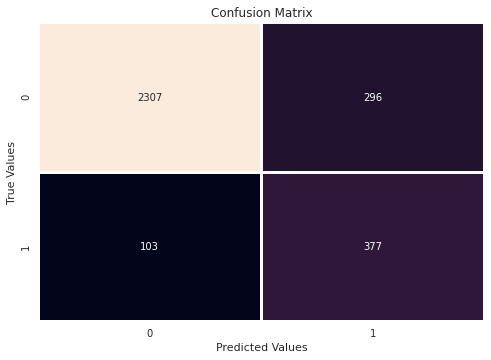

'y_pred_proba = eclf.predict_proba(X_test)[::,1]\nfpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)\nauc = metrics.roc_auc_score(y_test, y_pred_proba)\nplt.plot(fpr,tpr,label="auc="+str(auc))\nplt.legend(loc=4)\nplt.show()'

In [6]:
from sklearn.metrics import accuracy_score,precision_score,recall_score ,roc_auc_score ,roc_curve, auc , precision_recall_fscore_support


print("Training Metrics")
print("Accuracy:",accuracy_score(y_train_bal,eclf_train_pred))
print("Precision:",precision_score(y_train_bal,eclf_train_pred))
print("Recall:",recall_score(y_train_bal,eclf_train_pred))
print("F1:",f1_score(y_train_bal,eclf_train_pred, average='weighted'))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_bal,eclf_train_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('Roc -Auc Curve',roc_auc)

print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,eclf_test_pred))
print("Precision:",precision_score(y_test,eclf_test_pred))
print("Recall:",recall_score(y_test,eclf_test_pred))
print("F1:",f1_score(y_test,eclf_test_pred, average='weighted'))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,eclf_test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('Roc -Auc Curve',roc_auc)

from sklearn.metrics import classification_report
print('Test Classification Report')
print(classification_report(y_test,eclf_test_pred))




from sklearn.metrics import roc_curve, auc

confusion_matrix = metrics.confusion_matrix(y_test, eclf_test_pred)

sns.heatmap(confusion_matrix,annot=True,
            lw =2,
            cbar=False,
            fmt="d"
           )
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix")
plt.show()

'''y_pred_proba = eclf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()'''


In [7]:
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)



for clf, label in zip([clf1, clf2, clf3, eclf], ['GradientBoosting', 'Random Forest', 'SVC', 'Ensemble']):
    fscores = cross_val_score(clf, X_train_bal, y_train_bal, scoring='f1', cv=5)
    
    scores = cross_val_score(clf,  X_train_bal, y_train_bal, scoring='roc_auc', cv=5)
   
    
    print("[%s] model bias bias (f1-score) %0.5f (variance %0.5f)" % (label,fscores.mean(), fscores.std()))
    print("[%s] model bias bias (AUC-score) %0.5f (variance %0.5f)" % (label,scores.mean(), scores.std()))


[GradientBoosting] model bias bias (f1-score) 0.87634 (variance 0.01511)
[GradientBoosting] model bias bias (AUC-score) 0.94473 (variance 0.00976)
[Random Forest] model bias bias (f1-score) 0.85815 (variance 0.00671)
[Random Forest] model bias bias (AUC-score) 0.93846 (variance 0.00530)
[SVC] model bias bias (f1-score) 0.84444 (variance 0.00553)
[SVC] model bias bias (AUC-score) 0.91511 (variance 0.00663)
[Ensemble] model bias bias (f1-score) 0.85841 (variance 0.00767)
[Ensemble] model bias bias (AUC-score) 0.94302 (variance 0.00652)


In [ ]:
rf_model =ExtraTreesClassifier(n_estimators=300, max_depth=3,min_samples_split=4,min_samples_leaf=1,criterion='gini', min_weight_fraction_leaf=0.0,random_state=123)


In [21]:
auc(fpr_grd_lm, tpr_grd_lm)

0.8917867290236604

In [26]:
auc(fpr_rt_lm, tpr_rt_lm)#, label='RT + LR')
#auc(fpr_rf, tpr_rf)#, label='RF')
#auc(fpr_rf_lm, tpr_rf_lm)#, label='RF + LR')
#auc(fpr_grd, tpr_grd)#, label='GBT')
#auc(fpr_grd_lm, tpr_grd_lm)#, label='GBT + LR')

0.8996198549194137